In [47]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\\Users\\Pranjal\Desktop\data\insurance2.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [49]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


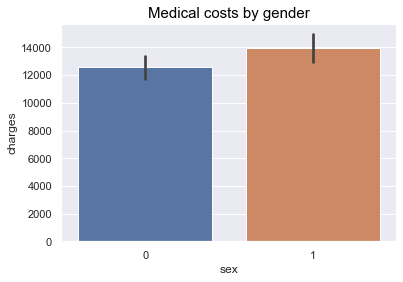

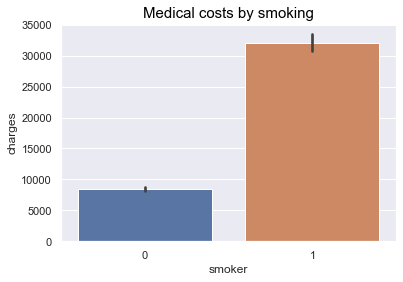

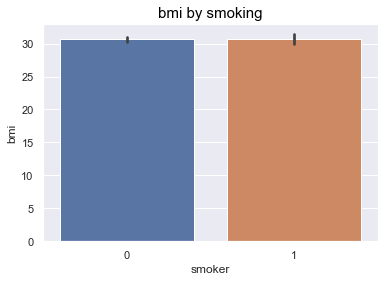

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
sns.barplot(x="sex",y="charges",data=df)
plt.title("Medical costs by gender",color='black',fontsize=15)
plt.show()
sns.barplot(x="smoker",y="charges",data=df)
plt.title("Medical costs by smoking",color='black',fontsize=15)
plt.show()
sns.barplot(x="smoker",y="bmi",data=df)
plt.title("bmi by smoking",color="black",fontsize=15)
plt.show()

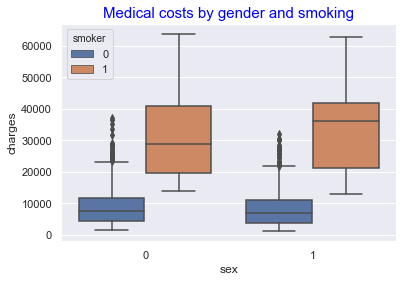

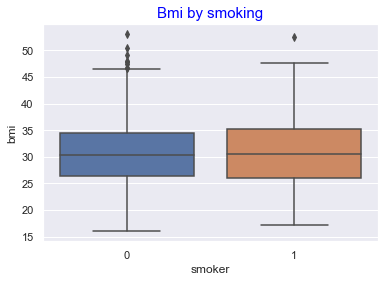

In [51]:
sns.boxplot(x="sex",y="charges",hue="smoker",data=df)
plt.title('Medical costs by gender and smoking',color='blue',fontsize=15)
plt.show()
sns.boxplot(x="smoker",y="bmi",data=df)
plt.title("Bmi by smoking",color='blue',fontsize=15)
plt.show()

In [52]:
df = pd.get_dummies(df, columns = ["region"], prefix = ["region"], drop_first=False)
df.head()

,age,sex,bmi,children,smoker,charges,insuranceclaim,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,1,0,0,0,1
1,18,1,33.770,1,0,1725.55230,1,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,1,0,0


In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(["insuranceclaim"],axis = 1)
y = df['insuranceclaim']
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
leaf_model=RandomForestRegressor(random_state=42)
leaf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [56]:
leaf_model.predict(x_test)[0:5]

array([0.05, 1.  , 1.  , 0.73, 1.  ])

In [57]:
y_pred=leaf_model.predict(x_test)

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.15596234715899632

In [59]:
# RF R2 score for test data
r2_score(y_test, y_pred)

0.8985856388227782